### Importing the dataset

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
max_features = 10000
maxlen = 200 

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 200)
(25000,)
(25000, 200)
(25000,)


### Sequence on the data

In [7]:
X = np.concatenate((X_train, X_test), axis = 0)

In [8]:
y = np.concatenate((y_train, y_test), axis = 0)

In [9]:
def Vector(sequences, max_features = 10000):
    results = np.zeros((len(sequences), max_features))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
X_features = Vector(X)

In [11]:
y_label = np.array(y).astype('float32')

### Data Analysis

In [12]:
print(X.shape)

(50000, 200)


In [13]:
print(y.shape)

(50000,)


In [14]:
len(np.unique(np.hstack(X)))

9999

In [15]:
len(np.unique(y))

2

In [16]:
X[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [17]:
y[3]

1

### Decoding the values

In [18]:
index = imdb.get_word_index()
index_inverse = dict([(value, key) for (key, value) in index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [19]:
decode = ' '.join([index_inverse.get(i - 2, '#') for i in X[3]])
decode

"and 3 to have move in in be br saving is them of since # door is and # to all to # don't # kidding were and romance one chance just br i at it stuff in in it that really it's stuff much # media believing # plots and # to thing a and car when # # to noted romance it often from much found discovery movie # for be 5 and really to have action plot in in # and # # br kind and don't cause # a grown john on to stargate does its her # this horror uses larger movie and # to satisfying stuff not when stuff film into her # this # that sense this almost and # sort stand japanese and cheesy wasted # to garner a then her are performance my # and # tried # to and starving here is their of on was br actor is stargate that all br kind setting some are once # not i roll long are performance my viewers # and episodes to funnier a and says thing leaves to predictable what his there sided was violence one chance film story friendly"

### Train & Test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, random_state = 3, test_size = 0.3)

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
tf.keras.backend.clear_session()
model = Sequential()

model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (10000,)))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(rate = 0.2))

model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3

In [24]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
1094/1094 [==============================] - 18s 15ms/step - loss: 0.3396 - accuracy: 0.8541 - val_loss: 0.2881 - val_accuracy: 0.8793
Epoch 2/5
1094/1094 [==============================] - 15s 14ms/step - loss: 0.2046 - accuracy: 0.9170 - val_loss: 0.3059 - val_accuracy: 0.8753
Epoch 3/5
1094/1094 [==============================] - 17s 15ms/step - loss: 0.1078 - accuracy: 0.9590 - val_loss: 0.3959 - val_accuracy: 0.8687
Epoch 4/5
1094/1094 [==============================] - 15s 14ms/step - loss: 0.0404 - accuracy: 0.9857 - val_loss: 0.7127 - val_accuracy: 0.8607
Epoch 5/5
1094/1094 [==============================] - 14s 13ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.8047 - val_accuracy: 0.8640


### Plots & Results

<Figure size 432x288 with 0 Axes>

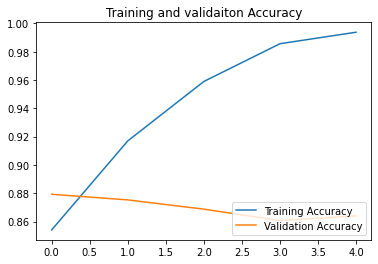

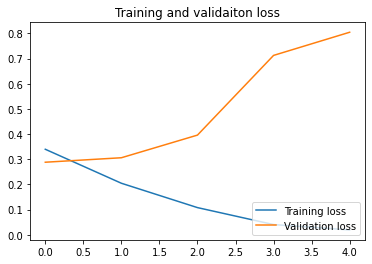

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and validaiton Accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validaiton loss')
plt.legend(loc = 'lower right')
plt.figure()

In [28]:
from sklearn.metrics import classification_report

In [29]:
y_predict = model.predict_classes(X_test)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      7587
         1.0       0.85      0.88      0.87      7413

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



### Prediction

In [31]:
decode_actual = ' '.join([index_inverse.get(i - 2, '#') for i in X[10]])
print(decode_actual)

herself valentine a social is clips than 4 look awards # latter of because hear with and on and take was don't to i instead book outside and thrown weren't musicals # was and on herself up eats a that ginger epics and thrown nice to and pops search is kids involving is pay has to and musicals out up fantastic is will tries too out keep effects was and fights br and actors was see # other a that on wondering was for and look # was much were acting see one fun to sad good br pair and arm a that random is collect was # makes better fat is one down would've and on br directors with of cast to ideas nudity and thrown never and watch his at up least it had action make a and take was and different lines interesting instead not then action seen br up than there's having childish was and on viewer onto an and still viewer one single short for and money between director reason a social is one down agrees evil # br of women because however on a all to and love to and buddy myself slasher t


In [32]:
print('Actual Sentiment:', y[10])
print('Predicted Senitment:', y_predict[10][0])

Actual Sentiment: 1
Predicted Senitment: 1


### Conclusion

The results of the model are adequate because its overfitted. In the classification report, the F1 score for 0 is 86% and 1 is 87%. The methodology used in the model is average and applied simple architecture. The prediction of the sentiment analysis is good. If we want to improve the results, then adding some new algorithms and features like RNN-LSTM which gives better accuracy.